# Machine Learning & Tech Stocks

NVDA Historical Data: https://finance.yahoo.com/quote/NVDA/history?p=NVDA

MSFT Historical Data: https://finance.yahoo.com/quote/MSFT/history?p=MSFT

ASML Historical Data: https://finance.yahoo.com/quote/ASML/history?p=ASML

APPL Historical Data: https://finance.yahoo.com/quote/AAPL/history?p=AAPL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## NVIDIA Stock Price Prediction

In [2]:
# Importing the training set
url = '~/wd/GitHub/TechStocks/training_set.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Preview dataset
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-14,36.680000,37.865002,36.442501,37.610001,37.317863,73016800
1,2019-01-15,37.939999,38.337502,37.282501,37.467499,37.176472,61701200
2,2019-01-16,37.742500,38.075001,37.154999,37.209999,36.920975,47010400
3,2019-01-17,36.877499,38.332500,36.602501,37.930000,37.635376,49343600
4,2019-01-18,38.432499,39.494999,37.912498,39.232498,38.927757,65133600


In [4]:
len(dataset_train)

1239

### Data Normalization
We normalize the data by changing the values of numeric columns in the dataset to a common scale, which helps the performance of the model. Then to scale the training dataset, use Scikit-Learn’s MinMaxScaler with numbers between zero and one.

In [5]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Incorporating Timesteps Into Data
Input our data in the form of a 3D array to the LSTM model by first creating data in 60 timesteps before using numpy to convert it into an array, then convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.


In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, 1239): # 60 is the number of timesteps
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # Reshaping

### LSTM Model

In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

2024-01-14 01:13:48.456073: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


The LSTM layer is added with the following arguments: 50 units is the dimensionality of the output space, return_sequences=True is necessary for stacking LSTM layers so the consequent LSTM layer has a three-dimensional sequence input, and input_shape is the shape of the training dataset.

Specifying 0.2 in the Dropout layer means that 20% of the layers will be dropped. Following the LSTM and Dropout layers, we add the Dense layer that specifies an output of one unit. To compile our model we use the Adam optimizer and set the loss as the mean_squared_error. After that, we fit the model to run for 100 epochs (the epochs are the number of times the learning algorithm will work through the entire training set) with a batch size of 32.

In [8]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
37/37 [==============================] - 15s 114ms/step - loss: 0.0270
Epoch 2/100
37/37 [==============================] - 4s 106ms/step - loss: 0.0059
Epoch 3/100
37/37 [==============================] - 4s 108ms/step - loss: 0.0047
Epoch 4/100
37/37 [==============================] - 4s 105ms/step - loss: 0.0042
Epoch 5/100
37/37 [==============================] - 4s 102ms/step - loss: 0.0039
Epoch 6/100
37/37 [==============================] - 4s 96ms/step - loss: 0.0032
Epoch 7/100
37/37 [==============================] - 4s 112ms/step - loss: 0.0037
Epoch 8/100
37/37 [==============================] - 4s 102ms/step - loss: 0.0036
Epoch 9/100
37/37 [==============================] - 4s 110ms/step - loss: 0.0033
Epoch 10/100
37/37 [==============================] - 4s 102ms/step - loss: 0.0034
Epoch 11/100
37/37 [==============================] - 4s 115ms/step - loss: 0.0031
Epoch 12/100
37/37 [==============================] - 5s 125ms/step - loss: 0.0030
Epoch 13/100


### Making Predictions from the Test Set

Before predicting future stock prices, modify the test set (notice similarities to the edits made to the training set): merge the training set and the test set on the 0 axis, set 60 as the time step again, use MinMaxScaler, and reshape data. Then, inverse_transform puts the stock prices in a normal readable format.

In [9]:
# Import the test set
url = '~/wd/GitHub/TechStocks/test_set.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [10]:
len(dataset_test)

20

In [12]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Plotting the Results
Use matplotlib to visualize the result of the predicted stock price and the actual stock price.

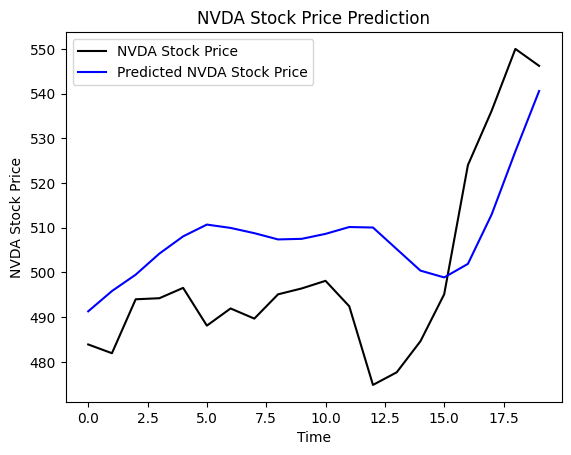

In [13]:
plt.plot(real_stock_price, color = 'black', label = 'NVDA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted NVDA Stock Price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NVDA Stock Price')
plt.legend()
plt.show()